In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import KernelPCA

c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stocks = pd.read_csv("stocks_index.csv")

stock_list = stocks['Symbols'].tolist()
print("DJI and stocks:\n",stock_list)

noa = len(stock_list)

DJI and stocks:
 ['MMM', 'AXP', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'AAPL', '^DJI']


In [3]:
data = pd.DataFrame()
for i in stock_list:
    filename=i+'.csv'
    df = pd.read_csv(filename)
    price = df[['Adj Close','Date']].set_index('Date')
    price.rename(columns={'Adj Close': i}, inplace=True)
    data = pd.concat([data,price], axis=1)
data = data.dropna()
dji = pd.DataFrame(data.pop('^DJI'))
print("Data shape: ", data.shape)
print("Data describe():\n", data.describe())

Data shape:  (2422, 30)
Data describe():
                MMM          AXP           BA          CAT          CVX  \
count  2422.000000  2422.000000  2422.000000  2422.000000  2422.000000   
mean    106.649842    55.989458    92.750705    71.304028    83.828529   
std      47.243454    21.134161    48.882705    21.151745    19.983157   
min      33.676079     8.863408    23.466995    17.152760    41.237961   
25%      68.668143    38.754933    56.109745    59.385302    65.034069   
50%      85.317349    54.505117    67.075157    73.790798    86.411297   
75%     147.998421    75.743932   124.850678    84.658609   100.599403   
max     237.679993    95.790001   266.000000   138.240005   120.220001   

              CSCO           KO         DWDP          XOM           GE  \
count  2422.000000  2422.000000  2422.000000  2422.000000  2422.000000   
mean     20.906536    31.558760    37.333759    71.691355    19.740360   
std       5.585084     8.508863    13.343957    11.792824     6.29642

In [4]:
#PCA analysis. Normalize the data using lambda function
scale_function = lambda x: (x - x.mean()) / x.std()
X=data.apply(scale_function)
print ("data after normalization shape: ",X.shape)
print ("data after normalization describe\n", X.describe())
pca = KernelPCA().fit(X)
print ("Number of Eigenvalue(components) from the model: ",len(pca.lambdas_))

data after normalization shape:  (2422, 30)
data after normalization describe
                 MMM           AXP            BA           CAT           CVX  \
count  2.422000e+03  2.422000e+03  2.422000e+03  2.422000e+03  2.422000e+03   
mean  -9.387848e-17 -9.387848e-17 -9.387848e-17  3.755139e-16 -2.346962e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.544632e+00 -2.229852e+00 -1.417346e+00 -2.560132e+00 -2.131323e+00   
25%   -8.039569e-01 -8.154819e-01 -7.495690e-01 -5.634866e-01 -9.405151e-01   
50%   -4.515439e-01 -7.023419e-02 -5.252481e-01  1.175681e-01  1.292472e-01   
75%    8.752235e-01  9.347177e-01  6.566734e-01  6.313702e-01  8.392505e-01   
max    2.773509e+00  1.883233e+00  3.544184e+00  3.164560e+00  1.821107e+00   

               CSCO            KO          DWDP           XOM            GE  \
count  2.422000e+03  2.422000e+03  2.422000e+03  2.422000e+03  2.422000e+03   
mean  -3.755139e-16  9.387848e-17  1.877570e-16  1.

In [6]:
#first 10 eigenvalue
print("First 10 eigenvalue: ",(pca.lambdas_)[:10].round())

First 10 eigenvalue:  [ 62177.   4737.   1636.   1188.    662.    540.    378.    286.    194.
    155.]


In [7]:
#normaize to percentage
get_weight = lambda x: x / x.sum()
print("First 10 components wieght: ",get_weight(pca.lambdas_)[:10])
print("First 10 components total wieght: ",get_weight(pca.lambdas_)[:10].sum())
print("First 5 components total wieght: ",get_weight(pca.lambdas_)[:5].sum())
print("First 2 components total wieght: ",get_weight(pca.lambdas_)[:2].sum())
print("First 1 components total wieght: ",get_weight(pca.lambdas_)[:1].sum())

First 10 components wieght:  [ 0.85607493  0.06522568  0.02253071  0.01635388  0.00910947  0.00743273
  0.00519892  0.00394175  0.00266687  0.00213074]
First 10 components total wieght:  0.990665674586
First 5 components total wieght:  0.969294672584
First 2 components total wieght:  0.921300613656
First 1 components total wieght:  0.856074934074


5 individual component shape: (2422, 5)
[[ -4.77504076   1.22402418  -0.42646534   1.37201129  -1.47250613]
 [ -4.48034224   1.250678    -0.51159202   1.60817307  -1.45606618]
 [ -4.34180412   1.2112427   -0.5735677    1.62583627  -1.48471325]
 ..., 
 [ 11.22969175   1.36585369  -2.53251511  -1.71336643   0.72240255]
 [ 11.33604765   1.35745501  -2.5599873   -1.7101442    0.71184736]
 [ 11.37150549   1.52090763  -2.62055119  -1.94007124   0.66056337]]
                    ^DJI      PCA1      PCA2      PCA3      PCA4      PCA5
Date                                                                      
2008-03-19  12099.660156 -4.775041  1.224024 -0.426465  1.372011 -1.472506
2008-03-20  12361.320313 -4.480342  1.250678 -0.511592  1.608173 -1.456066
2008-03-24  12548.639648 -4.341804  1.211243 -0.573568  1.625836 -1.484713
2008-03-25  12532.599609 -4.344635  1.238833 -0.603643  1.606714 -1.483026
2008-03-26  12422.860352 -4.443626  1.152542 -0.543178  1.550730 -1.532209
5 individual compon

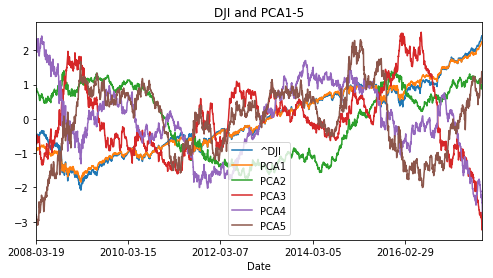

In [13]:
#Construct PCA index
%matplotlib inline

pca_comps=KernelPCA(n_components=5).fit_transform(X)

dji['PCA1'] = pca_comps[:,0]
dji['PCA2'] = pca_comps[:,1]
dji['PCA3'] = pca_comps[:,2]
dji['PCA4'] = pca_comps[:,3]
dji['PCA5'] = pca_comps[:,4]
print("5 individual component shape:",pca_comps.shape)
print(pca_comps)
print(dji.head())
print("5 individual component with dji shape:",dji.shape)
dji.apply(scale_function).plot(title="DJI and PCA1-5",figsize=(8, 4))
plt.show()

In [14]:
data['PCA1'] = pca_comps[:,0]
data['PCA2'] = pca_comps[:,1]
data['PCA3'] = pca_comps[:,2]
data['PCA4'] = pca_comps[:,3]
data['PCA5'] = pca_comps[:,4]

print ("data and PCA:", data.head())

data and PCA:                   MMM        AXP         BA        CAT        CVX       CSCO  \
Date                                                                           
2008-03-19  61.939545  35.497150  57.067947  55.286198  57.928406  20.217285   
2008-03-20  60.778229  38.860931  58.116833  55.353668  58.862186  20.465147   
2008-03-24  61.292625  40.069515  59.274494  57.010838  59.428093  21.183947   
2008-03-25  61.557652  40.154030  58.971500  57.468227  59.802998  21.274828   
2008-03-26  61.308231  38.336922  59.282276  58.008121  60.100121  20.473408   

                   KO       DWDP        XOM         GE    ...            VZ  \
Date                                                      ...                 
2008-03-19  22.409376  34.463402  64.788795  25.094465    ...     20.104706   
2008-03-20  22.813015  34.529667  65.226196  26.434151    ...     20.671286   
2008-03-24  22.865337  35.646572  65.955193  26.370691    ...     21.157734   
2008-03-25  22.951298  35.8358

In [18]:
corr1 = data.apply(scale_function).corr()
print (": \n",corr1)
corr2 =corr1.iloc[0:30,30:35]
print ("corr2:\n", corr2)

: 
            MMM       AXP        BA       CAT       CVX      CSCO        KO  \
MMM   1.000000  0.841121  0.964021  0.703244  0.770275  0.902255  0.928012   
AXP   0.841121  1.000000  0.845258  0.798831  0.904612  0.673143  0.892345   
BA    0.964021  0.845258  1.000000  0.729591  0.759192  0.875680  0.878141   
CAT   0.703244  0.798831  0.729591  1.000000  0.867428  0.502626  0.773134   
CVX   0.770275  0.904612  0.759192  0.867428  1.000000  0.557971  0.879151   
CSCO  0.902255  0.673143  0.875680  0.502626  0.557971  1.000000  0.745228   
KO    0.928012  0.892345  0.878141  0.773134  0.879151  0.745228  1.000000   
DWDP  0.942504  0.837860  0.938189  0.787118  0.775203  0.873388  0.870215   
XOM   0.754252  0.865139  0.708301  0.737046  0.930659  0.555587  0.854515   
GE    0.871504  0.785084  0.812075  0.606851  0.749445  0.815596  0.865310   
GS    0.799002  0.681748  0.817666  0.538984  0.529655  0.874997  0.635422   
HD    0.980413  0.799435  0.940171  0.633198  0.737903  0.88

In [19]:
y = corr2.index.values
corr2=corr2.values
print ("y:\n",y)

y:
 ['MMM' 'AXP' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DWDP' 'XOM' 'GE' 'GS' 'HD' 'IBM'
 'INTC' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'TRV' 'UNH' 'UTX'
 'VZ' 'V' 'WMT' 'DIS' 'AAPL']


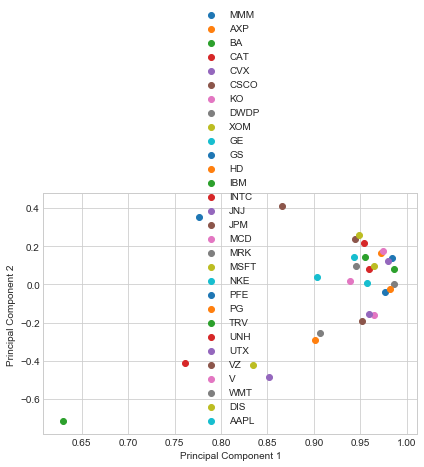

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('MMM', 'AXP', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GE',
                        'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',\
                        'PFE','PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS', 'AAPL'),\
                        ('blue', 'red', 'green','yellow','cyan','teal','tan','lime','purple','stealblue',
                        'peru','navy','violet','orange','olive','grey','khaki','firebrick','coral','chocolate',\
                        'royalblue','indigo','yellowgreen','springgreen','slateblue','violet','lightgreen','maroon','aqua','brown')):
    #for lab in stock_list:
        plt.scatter(corr2[y==lab, 0],
                    corr2[y==lab, 1],
                    label=lab)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
